2.1 Phân vùng  theo histogram

2.1.1 Phương pháp Otsu

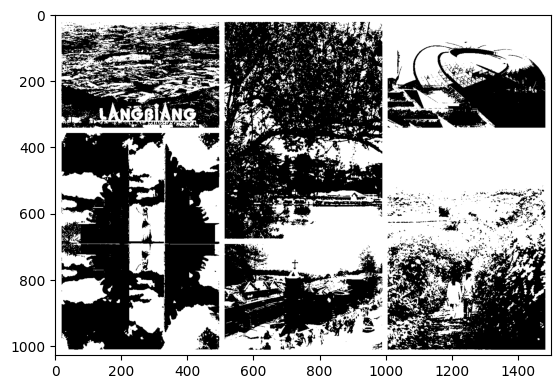

In [3]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('exercise/dalat.jpg').convert('L')

a = np.asarray(data)

thres = threshold_otsu(a)

b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.1.2 Phương pháp Adaptive Thresholding

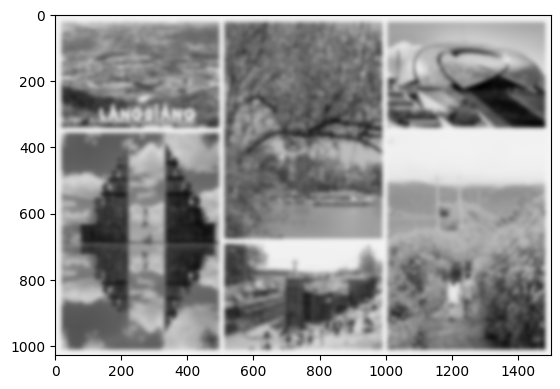

In [4]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('exercise/dalat.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = Image.fromarray(b)

plt.imshow(b)
plt.show()

2.2 phân vùng theo region

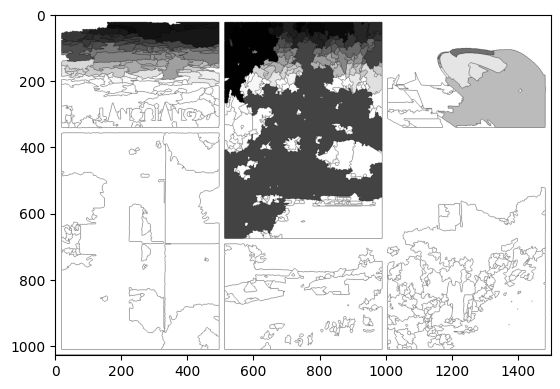

In [5]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = cv2.imread('exercise/dalat.jpg')

a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)

thresh, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


b2 = cv2.erode(b1, None, iterations=2)

dist_trans = cv2.distanceTransform(b2, cv2.DIST_L2, 3)


thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, ncc = label(dt)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()

2.3 Biến đổi đối tượng trong ảnh

2.3.1 Sử dụng binary dilation

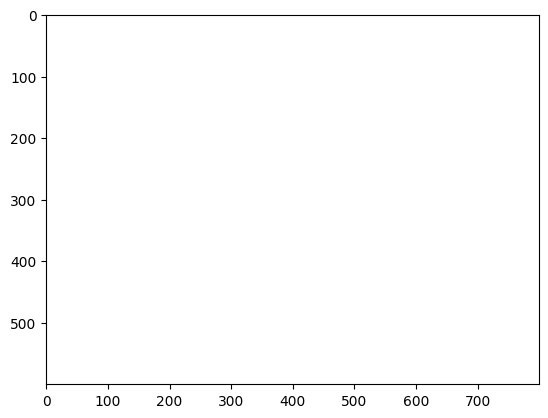

In [7]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label 
import matplotlib.pylab as plt
from skimage.filters import threshold_local 


data = Image.open('a.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.2 Sử dụng binary_Opening

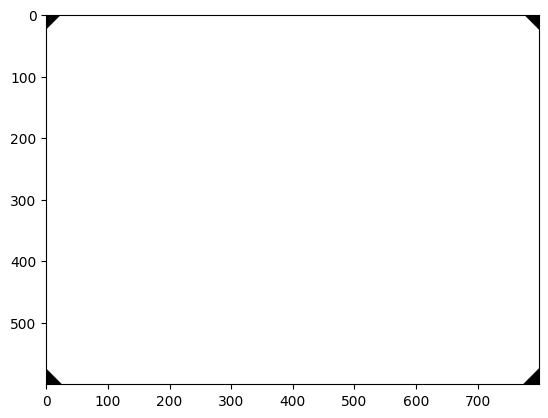

In [8]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label # This import is present in the image but not used in the provided code snippet
import matplotlib.pylab as plt
from skimage.filters import threshold_local # This import is present in the image but not used in the provided code snippet

# opening the image and converting it to grayscale
data = Image.open('a.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.3 Sử dụng binary_erosion

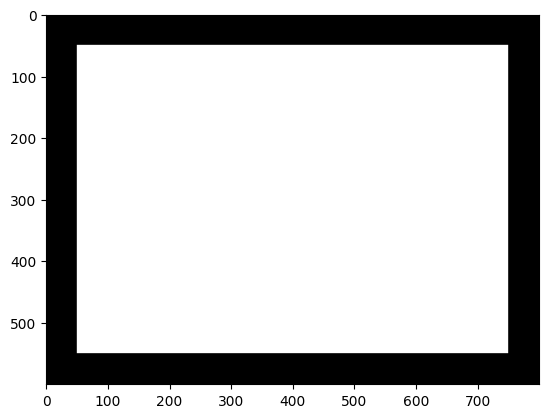

In [9]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label # This import is present in the image but not used in the provided code snippet
import matplotlib.pylab as plt
from skimage.filters import threshold_local # This import is present in the image but not used in the provided code snippet

# opening the image and converting it to grayscale
data = Image.open('a.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()

2.3.4  Sử dụng binary_closing

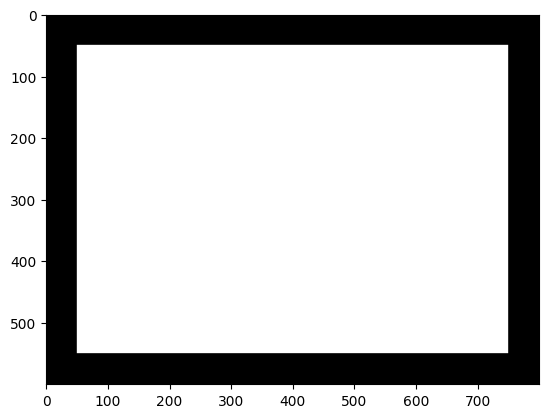

In [10]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label # This import is present in the image but not used in the provided code snippet
import matplotlib.pylab as plt
from skimage.filters import threshold_local # This import is present in the image but not used in the provided code snippet

# opening the image and converting it to grayscale
data = Image.open('a.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()